# Purpose and Objective of the Medical Expenses Project

The main objective of this project is to explore and analyze a dataset related to patients' medical expenses. Through this analysis, the goal is to develop a simple linear regression model that can predict medical costs based on certain patient characteristics.

This project focuses on the initial exploration of the data and the creation of a basic model, which will serve as a starting point for future developments. As deeper analysis is conducted, it is expected that patterns and more complex relationships will be identified, leading to more accurate and robust prediction models in the future.

It is important to emphasize that, while this project focuses on a linear regression model, the intention is to establish a solid foundation upon which more advanced and efficient models can be built, contributing to a better understanding of the factors influencing medical expenses and, consequently, healthcare.


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import statsmodels.api as sm
%run ../scripts/auxiliar_functions

## Data loading and first visualization:

In [125]:
df = pd.read_csv('../data/raw/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Getting basic information about the dataset

In [126]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [127]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Exploring the "Age" column

In [128]:
df.custom.frequency_table('age')

,age,count,FI,hi
0,18,69,69,0.051570
1,19,68,137,0.050822
2,46,29,166,0.021674
3,52,29,195,0.021674
4,50,29,224,0.021674
5,47,29,253,0.021674
6,48,29,282,0.021674
7,51,29,311,0.021674
8,45,29,340,0.021674
9,20,29,369,0.021674


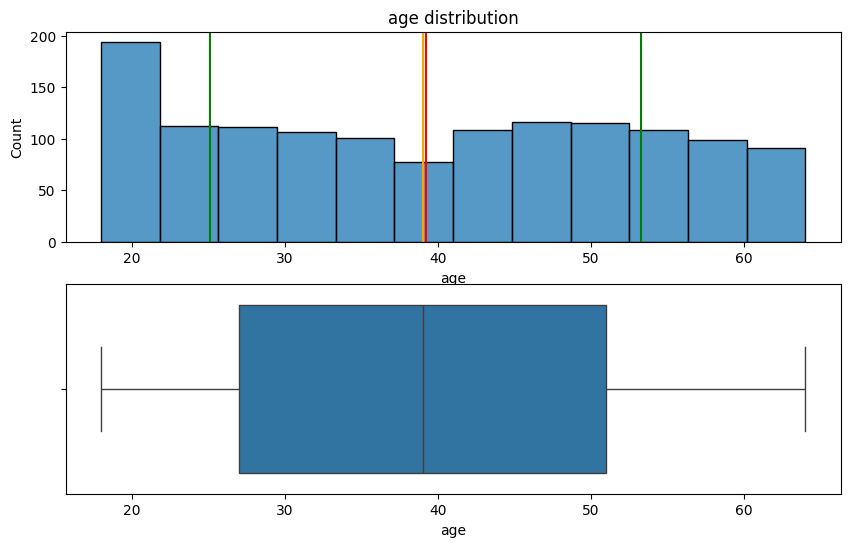

In [129]:
df.custom.distribution_analysis(df['age'])

## Exploring the "bmi" column

        bmi  count    FI        hi
0    32.300     13    13  0.009716
1    28.310      9    22  0.006726
2    30.800      8    30  0.005979
3    31.350      8    38  0.005979
4    30.495      8    46  0.005979
..      ...    ...   ...       ...
543  39.425      1  1334  0.000747
544  40.480      1  1335  0.000747
545  38.900      1  1336  0.000747
546  47.410      1  1337  0.000747
547  19.300      1  1338  0.000747

[548 rows x 4 columns]


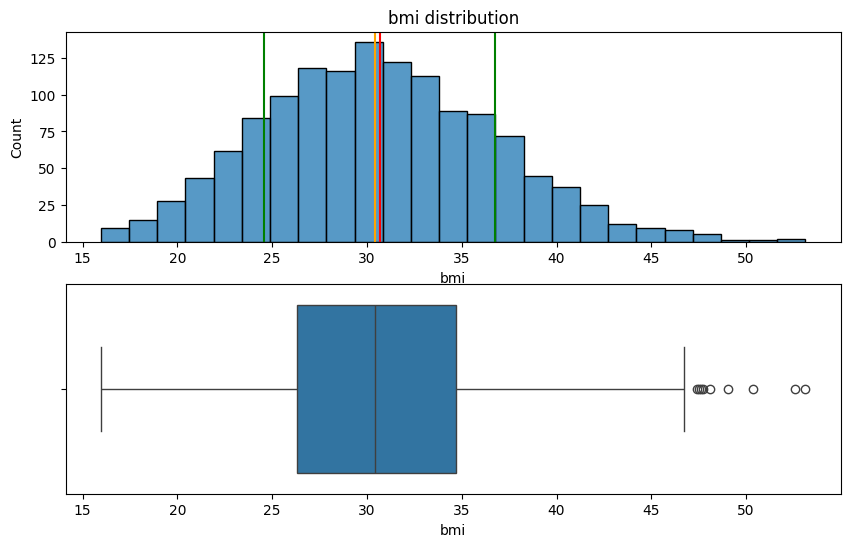

In [130]:
print(df.custom.frequency_table('bmi'))
df.custom.distribution_analysis(df['bmi'])

In [131]:
bmi_f_table = df.custom.frequency_table('bmi')
bmi_f_table.to_excel('bmi frecuency table.xlsx',index=False)

## The boxplot reveals the presence of some outliers. 
### Proceding to a more detailed analysis of these points to understand their impact on the distribution of the data.


In [132]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
filter_ = df['bmi'] > Q3 + 1.5 * IQR
df[filter_]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


#### According to the research conducted, a BMI greater than 47 indicates a state of extreme obesity and is associated with various health risks. If someone has a BMI in that range, it is advisable to seek guidance from a healthcare professional for a more comprehensive evaluation and appropriate treatment options. In our dataset, these records represent outliers but seem to be perfectly valid.

## Exploring the "Charges" column

In [133]:
df.custom.frequency_table('charges')

,charges,count,FI,hi
0,1639.56310,2,2,0.001495
1,2221.56445,1,3,0.000747
2,19798.05455,1,4,0.000747
3,13063.88300,1,5,0.000747
4,13555.00490,1,6,0.000747
...,...,...,...,...
1332,1149.39590,1,1334,0.000747
1333,37079.37200,1,1335,0.000747
1334,4738.26820,1,1336,0.000747
1335,2897.32350,1,1337,0.000747


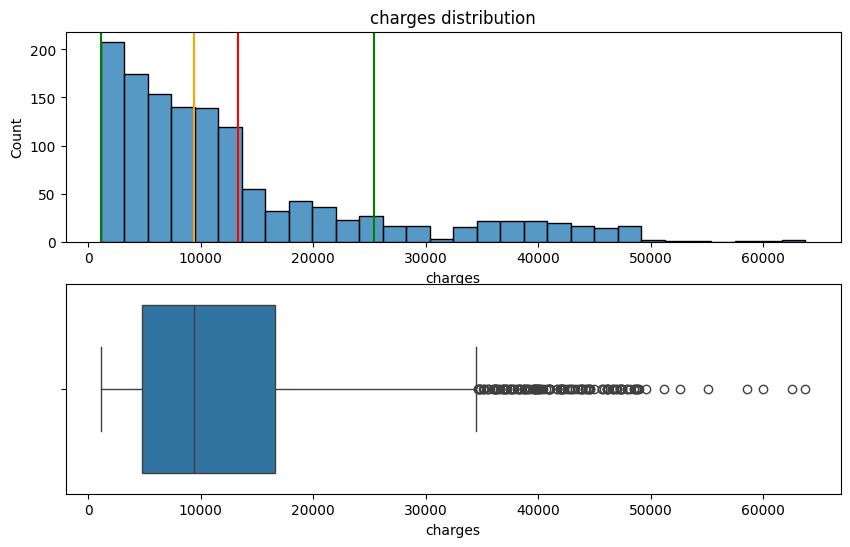

In [134]:
df.custom.distribution_analysis(df['charges'])

## The boxplot reveals the presence of some outliers. 
### We will proceed to conduct a deeper analysis of the dependent variable later.

## Correlation analysis

### Age Vs Bmi

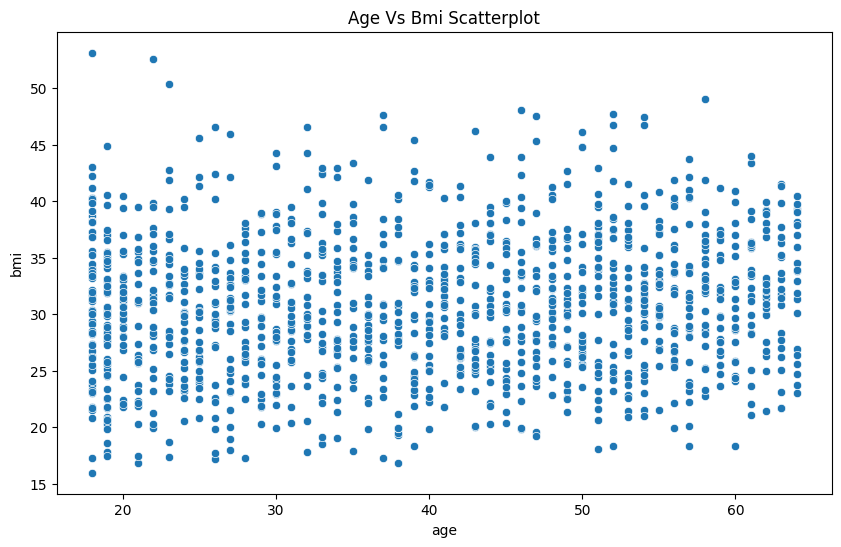

The Pearson correlation index is: 0.1092718815485352


In [135]:
plt.figure(figsize=(10,6))
plt.title('Age Vs Bmi Scatterplot')
sns.scatterplot(
    data=df,
    x='age',
    y='bmi',
)
plt.show()
print(f"The Pearson correlation index is: {df['age'].corr(df['bmi'])}")

#### The scatterplot and the Pearson correlation index suggest that there is no correlation between Age and BMI.

### Age Vs Charges

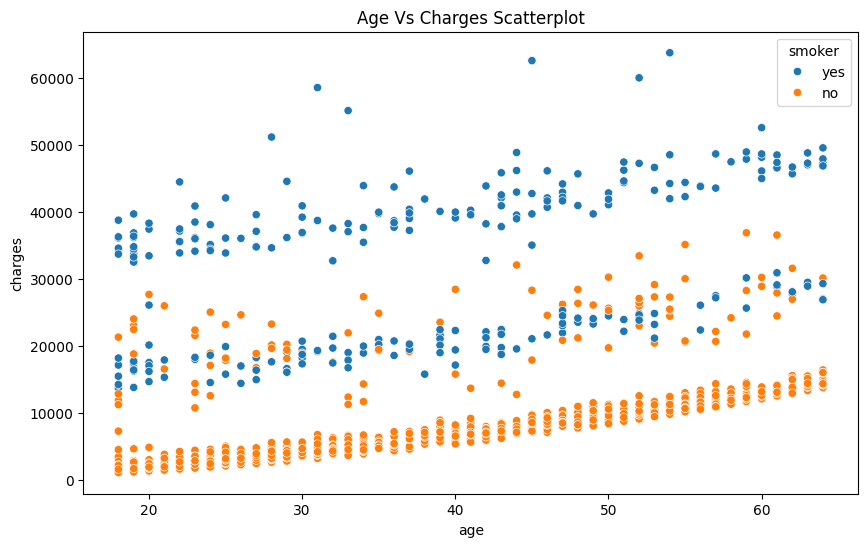

The Pearson correlation index is: 0.29900819333064754


In [136]:
plt.figure(figsize=(10,6))
plt.title('Age Vs Charges Scatterplot')
sns.scatterplot(
    data=df,
    x='age',
    y='charges',
    hue='smoker'
)
plt.show()
print(f"The Pearson correlation index is: {df['age'].corr(df['charges'])}")

#### The analysis of age against medical expenses reveals a Pearson correlation index of 0.299, indicating a weak correlation. The scatterplot appears quite dispersed; however, when separating the data into "smoker" and "non-smoker" categories, a certain degree of linearity becomes evident in the scatterplot.

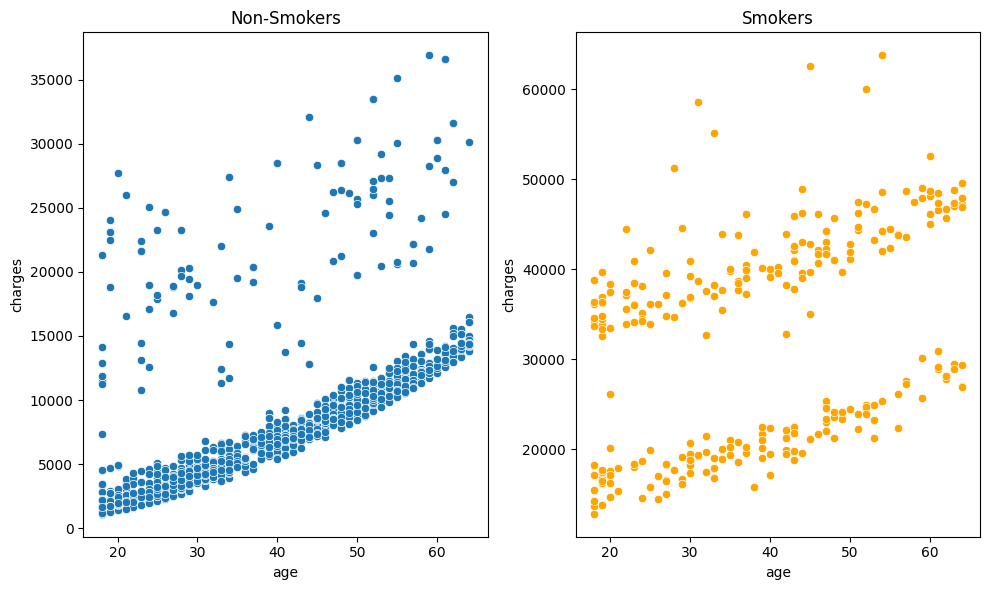

The Pearson correlation index between Age and Charges for smokers is 0.36822444373077773, while for non-smokers, it is 0.6279467837664193. 
Non-Smokers description: count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64
Smokers description: count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64


In [137]:
filter_ = df['smoker'] == "no"
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Non-Smokers')
sns.scatterplot(
    data=df[filter_],
    x=df['age'],
    y='charges'
)
plt.subplot(1,2,2)
plt.title('Smokers')
sns.scatterplot(
    data=df[~filter_],
    x=df['age'],
    y='charges',
    color='orange',
)
plt.tight_layout()
plt.show()
print(f"The Pearson correlation index between Age and Charges for smokers is {df['age'][~filter_].corr(df['charges'][~filter_])}, while for non-smokers, it is {df['age'][filter_].corr(df['charges'][filter_])}. ")
print(f"Non-Smokers description: {df['charges'][filter_].describe()}")
print(f"Smokers description: {df['charges'][~filter_].describe()}")

#### The Pearson correlation coefficients indicate a moderate positive correlation between Age and Charges, with values of 0.368 for smokers and 0.628 for non-smokers. This suggests that age is more strongly related to medical expenses in non-smokers. However, it's important to note that smokers generally incur higher medical costs, ranging from $12,829 to $63,770, compared to non-smokers, whose expenses range from $1,121 to $36,910. The weak correlation in smokers may indicate that the effects of tobacco can significantly vary among individuals, influenced by factors such as genetics, overall health, and lifestyle choices.

### Bmi Vs Charges

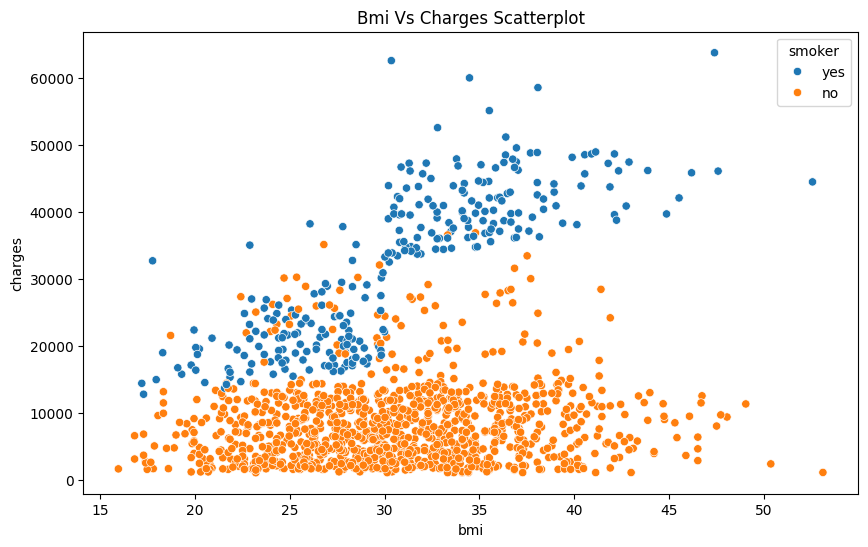

The Pearson correlation index is: 0.19834096883362895


In [138]:
plt.figure(figsize=(10,6))
plt.title('Bmi Vs Charges Scatterplot')
sns.scatterplot(
    data=df,
    x='bmi',
    y='charges',
    hue='smoker'
)
plt.show()
print(f"The Pearson correlation index is: {df['bmi'].corr(df['charges'])}")

#### The Pearson correlation is 0.19, which indicates a very weak correlation. The scatterplot shows very sparse points; however, if we separate the records for smokers and non-smokers, we can see a clear division in the data, with a stronger correlation for smokers.

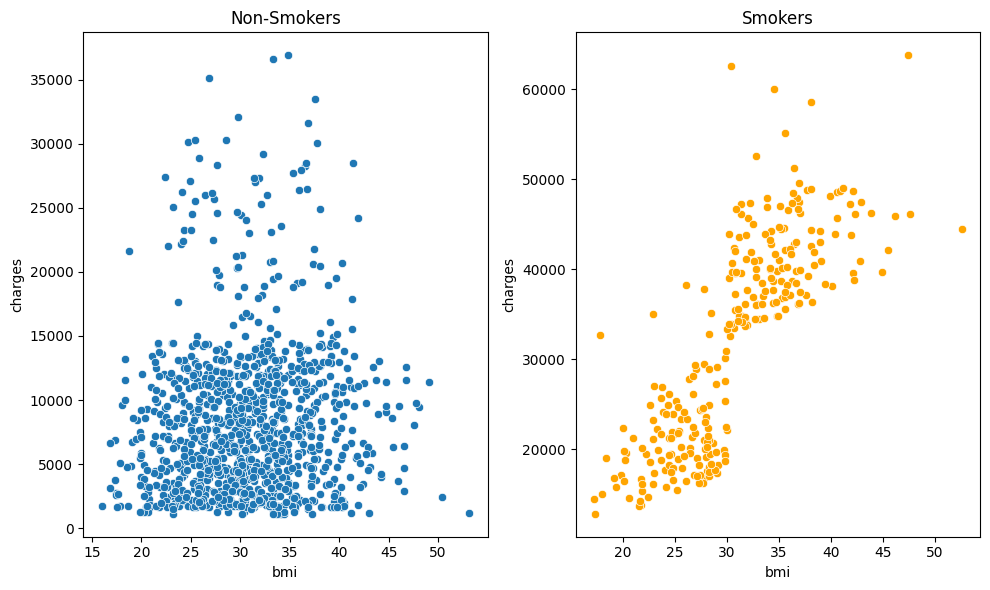

The Pearson correlation index between Bmi and Charges for smokers is 0.8064806070155405, while for non-smokers, it is 0.0840365431283327. 
Non-Smokers description: count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64
Smokers description: count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64


In [139]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Non-Smokers')
sns.scatterplot(
    data=df[filter_],
    x=df['bmi'],
    y='charges'
)
plt.subplot(1,2,2)
plt.title('Smokers')
sns.scatterplot(
    data=df[~filter_],
    x=df['bmi'],
    y='charges',
    color='orange',
)
plt.tight_layout()
plt.show()
print(f"The Pearson correlation index between Bmi and Charges for smokers is {df['bmi'][~filter_].corr(df['charges'][~filter_])}, while for non-smokers, it is {df['bmi'][filter_].corr(df['charges'][filter_])}. ")
print(f"Non-Smokers description: {df['charges'][filter_].describe()}")
print(f"Smokers description: {df['charges'][~filter_].describe()}")

### Correlation between BMI and Medical Charges

The Pearson correlation index between **BMI** and **Charges** for smokers is **0.81**, indicating a strong positive correlation. This suggests that as BMI increases, medical charges rise significantly for smokers. In contrast, for **non-smokers**, the Pearson correlation is only **0.08**, showing a very weak relationship between BMI and medical expenses. This difference underscores the substantial impact smoking has on medical costs related to BMI.

Additionally, there is a notable difference in the range of medical expenses between smokers and non-smokers. Non-smokers have medical expenses ranging from **\$1,121** to **\$36,910** with a mean of **\$8,434**, while smokers' expenses range from **\$12,829** to **\$63,770**, with a significantly higher mean of **\$32,050**. This vast difference highlights how smoking drastically increases medical costs, especially for those with higher BMIs.


## Scaling the predictors numerical features (age,bmi,children)

In [140]:
features_to_scale = ['age','bmi','children']
scaler = MinMaxScaler()
df_transformed = df.copy()
df_transformed[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df_transformed

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,10600.54830
1334,0.000000,female,0.429379,0.0,no,northeast,2205.98080
1335,0.000000,female,0.562012,0.0,no,southeast,1629.83350
1336,0.065217,female,0.264730,0.0,no,southwest,2007.94500


## Applying One-hot Encoding to categorical features

In [141]:
ohe_features = ['sex','smoker','region']
df_transformed = pd.get_dummies(df_transformed, columns=ohe_features, drop_first=True)
df_transformed.rename(columns={'smoker_yes':'smoker'},inplace=True)
categorical_features = ['sex_male','smoker','region_northwest','region_southeast','region_southwest']
df_transformed[categorical_features] = df_transformed[categorical_features].astype(int)
df_transformed

,age,bmi,children,charges,sex_male,smoker,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,0,1,0,0,1
1,0.000000,0.479150,0.2,1725.55230,1,0,0,1,0
2,0.217391,0.458434,0.6,4449.46200,1,0,0,1,0
3,0.326087,0.181464,0.0,21984.47061,1,0,1,0,0
4,0.304348,0.347592,0.0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,1,0,1,0,0
1334,0.000000,0.429379,0.0,2205.98080,0,0,0,0,0
1335,0.000000,0.562012,0.0,1629.83350,0,0,0,1,0
1336,0.065217,0.264730,0.0,2007.94500,0,0,0,0,1


## Analyzing the dependent Variable

<Figure size 2000x1000 with 0 Axes>

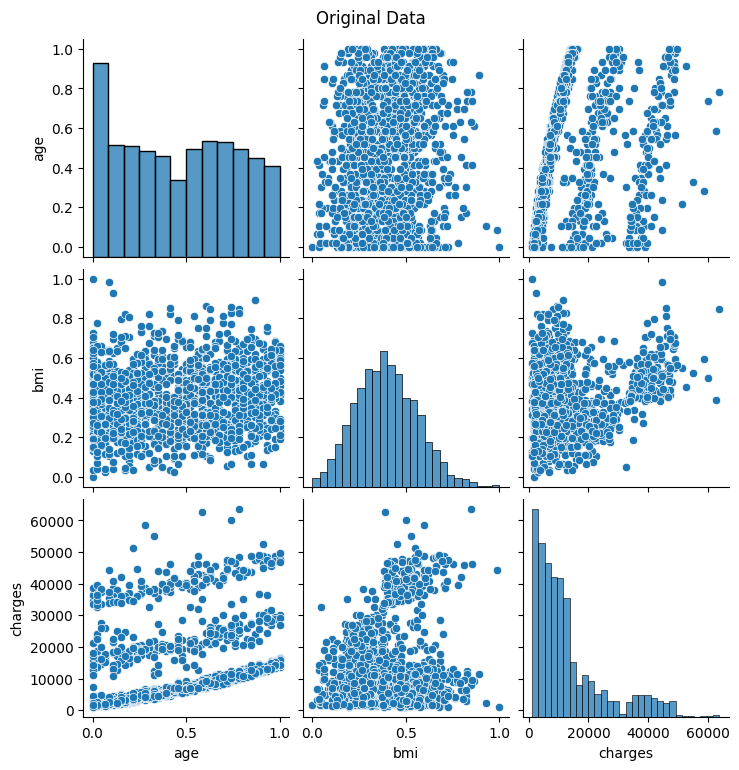

<Figure size 2000x1000 with 0 Axes>

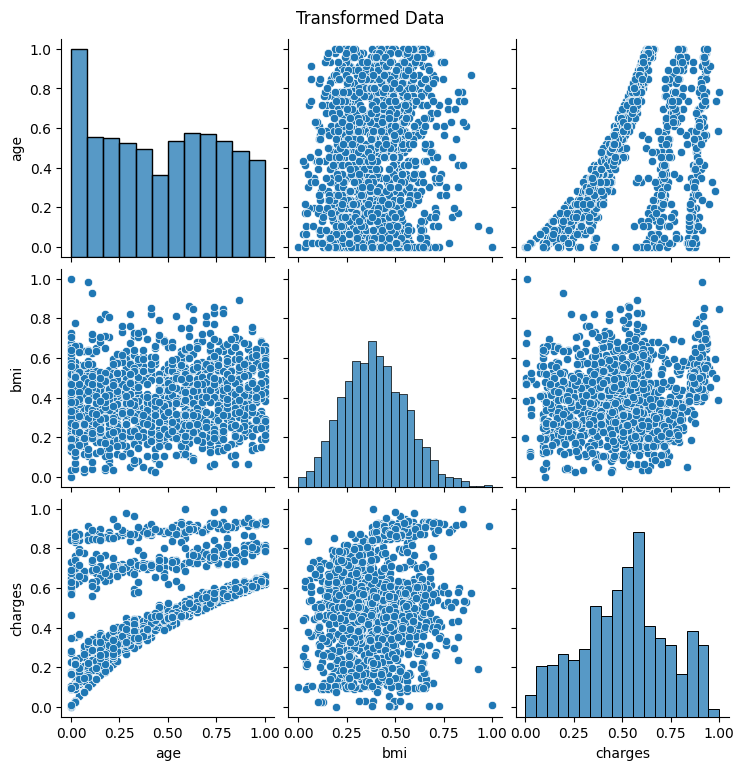

In [142]:
numerical_variables = ['age', 'bmi', 'charges']

plt.figure(figsize=(20, 10))
sns.pairplot(data=df_transformed[numerical_variables])
plt.suptitle('Original Data', y=1.02)  
plt.show()


df_transformed_2 = df_transformed.copy()
df_transformed_2['charges'] = np.log1p(df_transformed['charges'])
df_transformed_2['charges'] = scaler.fit_transform(df_transformed_2[['charges']])



plt.figure(figsize=(20, 10))
sns.pairplot(data=df_transformed_2[numerical_variables])
plt.suptitle('Transformed Data', y=1.02)  
plt.show()

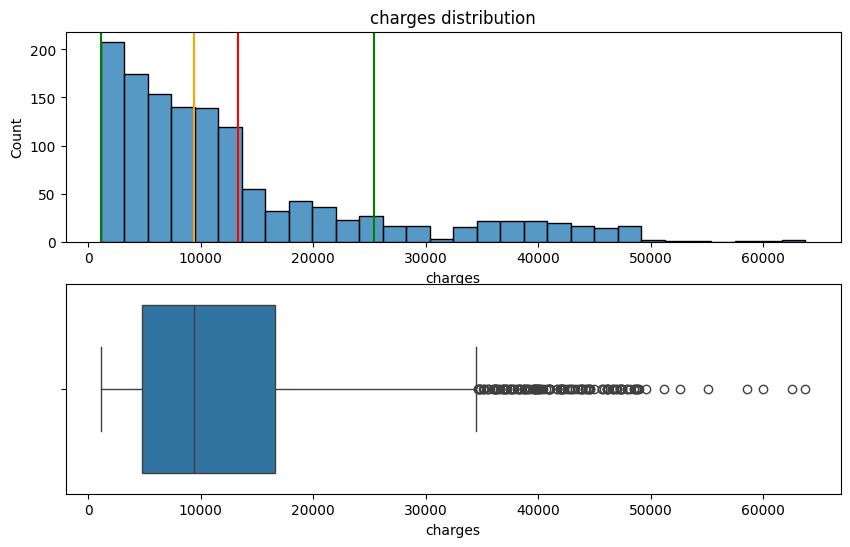

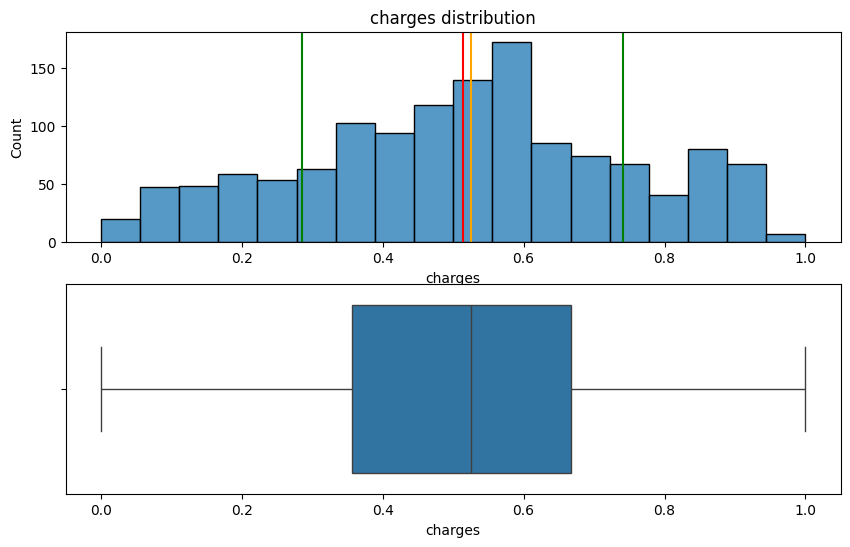

In [143]:

df.custom.distribution_analysis(df_transformed['charges'])
df.custom.distribution_analysis(df_transformed_2['charges'])


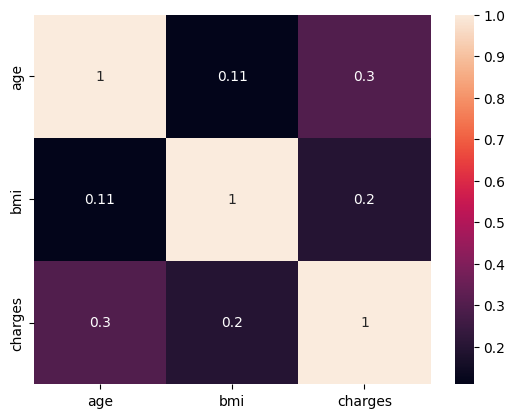

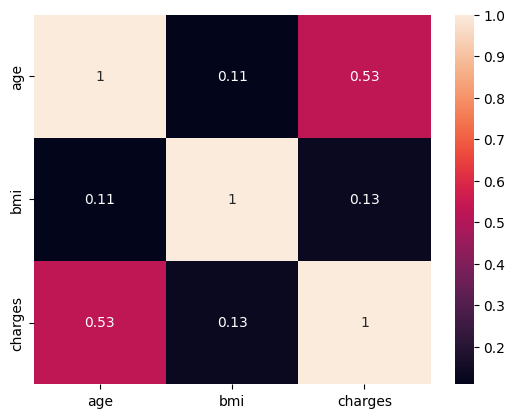

In [144]:
hm_1 = np.corrcoef(df_transformed[numerical_variables].values.T)
sns.heatmap(
    data=hm_1,
    annot=True,
    yticklabels=numerical_variables,
    xticklabels=numerical_variables
)

plt.show()
hm_2 = np.corrcoef(df_transformed_2[numerical_variables].values.T)
sns.heatmap(
    data=hm_2,
    annot=True,
    yticklabels=numerical_variables,
    xticklabels=numerical_variables
)
plt.show()


### Analysis of Variable Relationships

After applying the log transformation and MinMax scaling to the `charges` variable, we found that the relationships between the variables remained largely intact. The Pearson correlation coefficients between `charges` and other variables indicated that the overall structure of the data was preserved despite the transformations. Therefore, we will proceed with further analysis and modeling, confident that these transformations will enhance the interpretability and effectiveness of our predictive models.


## Training the linear regression model:

In [145]:
X_cols = list(df_transformed_2.columns.drop(['charges']))
y_col = ['charges']


X = df_transformed_2[X_cols]
y = df_transformed_2[y_col]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


## Evaluating the model:

In [146]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print("Scikit-Learn R2 and MSE:")
print("r2:", round(r2,4))
print("mse:", round(mse,4))
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

summary = model.summary()
with open('model_summary.txt', 'w') as f:
    f.write(str(summary))


Scikit-Learn R2 and MSE:
r2: 0.7783
mse: 0.0117


In [ ]:
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:48:14   Log-Likelihood:                 1059.7
No. Observations:                1338   AIC:                            -2101.
Df Residuals:                    1329   BIC:                            -2055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2087      0.011     19.605      0.000       0.188       0.230
age                  0.3937      0.010     39.655      0.000       0.374       0.413
bmi                  0.1231      0.019      6.382      0.000       0.085       0.161
children             0.1260      0.012     10.084      0.000       0.102       0.151
sex_male            -0.0187      0.006     -3.090      0.002      -0.031      -0.007
smoker               0.3847      0.007     51.336      0.000       0.370       0.399
region_northwest    -0.0158      0.009     -1.827      0.068      -0.033       0.001
region_southeast    -0.0389      0.009     -4.480      0.000      -0.056      -0.022
region_southwest    -0.0319      0.009     -3.681      0.000      -0.049      -0.015
==============================================================================
Omnibus:                      463.981   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1674.306
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                       7.331   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Regression Results

The Ordinary Least Squares (OLS) regression model was employed to predict medical charges (`charges`) based on several independent variables, including age, body mass index (BMI), number of children, sex, smoking status, and geographic region. Below is a summary of the key findings from the regression analysis:

### Model Summary
- **R-squared**: 0.768  
  This indicates that approximately 76.8% of the variability in medical charges can be explained by the independent variables included in the model, suggesting a strong fit.

- **Adjusted R-squared**: 0.767  
  The adjusted R² accounts for the number of predictors in the model, confirming that the model is effective in explaining the data.

- **F-statistic**: 549.8 (p-value = 0.00)  
  The F-statistic and its p-value indicate that at least one of the independent variables is significantly different from zero, validating the usefulness of the model.


### Key Findings
- **Intercept**: The intercept is 0.2087, representing the average medical charge when all independent variables are zero.
- **Age**: For each additional year of age, medical charges increase by an average of 0.3937 units, holding other factors constant (p < 0.001).
- **BMI**: A one-unit increase in BMI is associated with a rise of 0.1231 in medical charges, which is significant.
- **Number of Children**: Each additional child increases medical charges by 0.1260 units, with high significance.
- **Sex**: Being male (coded as 1) is associated with a decrease in medical charges of 0.0187 compared to females (p = 0.002).
- **Smoking Status**: Smokers have an average increase of 0.3847 units in medical charges compared to non-smokers (p < 0.001).
- **Geographic Regions**: Regional effects vary, with the northwest, southeast, and southwest regions showing negative coefficients compared to a reference region, with the southeast and southwest regions having significant effects.

### Model Diagnostics
- **Omnibus Test**: 463.981 (p < 0.001), indicating non-normal distribution of residuals.
- **Durbin-Watson**: 2.046 suggests no autocorrelation in the residuals.
- **Skewness**: 1.679 indicates a right-skewed distribution.
- **Kurtosis**: 7.331 suggests a leptokurtic distribution (more peaked than normal).

### Conclusion
The results of the OLS regression model indicate that age, BMI, number of children, smoking status, and sex are significant factors influencing medical charges. The model demonstrates a good fit, but further analysis is recommended to address the normality of residuals and improve prediction accuracy if necessary.
